# Tabular Playground Series - Feb 2022

This dataset is aimed to practive ML skills by using the genomic analysis technique data with some data compression and data loss.

ATATGGCCTT will be represented as A2T4G2C2 instead of the sequence.

Let's start with checking the data set and let's find out some direction for analysis.

PS. This is my first notebook for a competition and I find it very fun. I hope you guys will enjoy watch it and please feel free to leave a comment for further discussion. What I have done was learnt by other experts on Kaggle or video. I think it will be great to have a practical notebook and try to ask for suggestion from others instead of keep watching the video. Thanks for watching & have fun!

## Next Step & Discussion:

Having a K-fold and adjustment of XGBoost hyper-parameter do improve the accoruacy for the model (0.94448). After that, PCA was applied as well. It may not be a great way to be implmented since all features seems important and the validation of training model may not be represented on final test set. There will be other way to deal with. Let's try for another model or technique.

#### Result of the submission

17/02/2022 First trial (XGBoost): Score = 0.90366, Rank = 701

18/02/2022 Second trial (XGBoost) : Score = 0.91611, Rank = 720 (Accuracy was increased)

19/02/2022 Third trial (XGBoost with higher lambda & alpha): Score = 0.90005, Rank = NA

19/02/2022 Fourth trial (XGBoost with 100 lambda & alpha): Score = 0.82967, Rank = NA

19/02/2022 Fifth trial (XGBoost with no gamma + Second trial regularization): Score = 0.91781, Rank = 724

21/02/2022 Sixth trial (XGBoost with 10-fold & depth adjusted): Score = 0.94448, Rank = 679

22/02/2022 Seventh trial (XGBoost with 5-fold & PCA): Score = 0.86250, Rank = NA

22/02/2022 Eighth trial (XGBoost with 5-fold & features amount PCA): Score : 0.87796, Rank = NA 

In [23]:
# libraries set up
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read the data
train_path = 'Data/train.csv'
test_path = 'Data/test.csv'

train_set = pd.read_csv(train_path, index_col = 0)
test_set = pd.read_csv(test_path, index_col = 0)

In [5]:
# preview for the train data
df_train = train_set.copy()
df_train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [6]:
#preview for the test data
df_test = test_set.copy()
df_test.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [7]:
# check the shape for train set
df_train.shape

(200000, 287)

In [8]:
# check the shape for test set
df_test.shape

(100000, 286)

There are 200000 set data for model training. 

100000 testing sample was used for prediction and check with the performance by upload the result to Kaggle.

Now, let's check the whole data set and see is there any duplicate/non-numeric data/ missing value and some column needed to be worked on for feature engineering.

#### Missing value

Let's check is there any missing value for each sample in both training and testing set

In [9]:
# count the missing value in both data set
train_missing_count = 0
for i in df_train.columns:
    train_missing_count += df_train[i].isna().sum()

test_missing_count = 0
for i in df_test.columns:
    test_missing_count += df_test[i].isna().sum()
    
print('Missing value for train set: {0}'.format(train_missing_count))
print('Missing value for test set: {0}'.format(test_missing_count))

Missing value for train set: 0
Missing value for test set: 0


There is no missing value for the data set and we don't have to fill with other value. All the information was remained & obtained.

Next, we have to work on the duplicate.

#### Duplicate

Let's check the sample number for duplicate sample

In [10]:
# print the sample size for duplicate in both train and test set
print('Duplicate sample in train set: {0}'.format(df_train.duplicated().sum()))
print('Duplicate sample in test set: {0}'.format(df_test.duplicated().sum()))

Duplicate sample in train set: 76007
Duplicate sample in test set: 26779


Let's remove the duplicates for training set since it may cause overfitting issues.

In [11]:
# remove the duplicate and replace training set
df_train.drop_duplicates(subset = None, keep = 'first', inplace = True)

#### Object type encoding/ mapping

All the features should be numeric data except the target column but we can still check about the whole data set.

In [12]:
# check for the object column in training set
object_list = []
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        object_list.append(i)
print(object_list)

['target']


We can see that only the target columns was object type and it is the only column that we needed to do some feature engineering. We can check for the test set as well.

In [13]:
# check for the object column in testing set
object_list = []
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        object_list.append(i)
print(object_list)

[]


Now, all the features parameter was numeric and it can be applied easily for our model without any transformation at this moment.

Let's work on the target column in training set and change it to numeric value that's the model is readable.

There is two ways for handling this column: (1) Ordinal Encoding (2) One-Hot Encoding. From the description of the data set, there is ten type of bacteria as our target and Orginal Encoding will be a better way to deal with it since it is our target column and we dont want much column for each type of bacteria.

In [14]:
# let's check about what type of bacteria
list(df_train['target'].unique())

# let's assign a number for each type
ordinal_target = dict(enumerate(df_train['target'].unique()))
ordinal_target = {y:x for x,y in ordinal_target.items()}
ordinal_target

{'Streptococcus_pyogenes': 0,
 'Salmonella_enterica': 1,
 'Enterococcus_hirae': 2,
 'Escherichia_coli': 3,
 'Campylobacter_jejuni': 4,
 'Streptococcus_pneumoniae': 5,
 'Staphylococcus_aureus': 6,
 'Escherichia_fergusonii': 7,
 'Bacteroides_fragilis': 8,
 'Klebsiella_pneumoniae': 9}

In [15]:
reverse_target = {y:x for x,y in ordinal_target.items()}
reverse_target

{0: 'Streptococcus_pyogenes',
 1: 'Salmonella_enterica',
 2: 'Enterococcus_hirae',
 3: 'Escherichia_coli',
 4: 'Campylobacter_jejuni',
 5: 'Streptococcus_pneumoniae',
 6: 'Staphylococcus_aureus',
 7: 'Escherichia_fergusonii',
 8: 'Bacteroides_fragilis',
 9: 'Klebsiella_pneumoniae'}

In [16]:
# make another copy to prevent data change
label_df_train = df_train.copy()

# let's map with the dict that we create in the data set
label_df_train['target'] = label_df_train['target'].map(ordinal_target)

# let's check the data set after mapping/ ordinal encoding
label_df_train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,0
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,1
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,1
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,1
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,2


After the mapping, the data was ready for training the model and we can try it in a different.

Let's work a simple XGBoost model and check with the result first.

### XGBoost

In the XGBoost library, it got XGBoost Regressor & XGBoost Classifier. In the prediction, classification was needed and XGB Classifier will be used as the model.

In [17]:
# set up for machine learning libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Spliting of the data in data set is needed since the model performance needed to be determined.

In [18]:
# extract the features and the target
X = label_df_train.drop('target', axis = 1)
y = label_df_train['target']

# set the test size with 10% first since there is 200000 samples
test_size = 0.1
# split the train data into training set & testing set for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

#### K-fold

##### Sixth trial with K-fold

There is no obvious improvement by changing those hyper-parameter. Instead of making adjustment of regularization, the estimator, max_depth of the model was changed this time. Evaluation metrix will be auc for classification. To run faster, GPU was involved to save more time as well. For the data, cross validation will be used to increase the accuracy. The final result will be in average of 5-fold validation.

In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# create a list to contain the reuslt & accuracy
predictions = []
scores = []

# create a model for data fold
rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)

# iterate the folded data
for fold, (train_idx, valid_idx) in enumerate(rskf.split(X,y)):

    print(f"Fold: {fold + 1}")
    # seperate the train data set and test data set
    X_train, X_test = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[valid_idx]

    model = XGBClassifier(n_estimators = 1000, learning_rate = 0.05, objective = 'multi:softmax', 
                        max_depth = 10, booster = 'gbtree', gamma= 0,
                        eval_metric = 'auc', tree_method = 'hist', use_label_encoder = False)
    model.fit(X_train, y_train, verbose = 0)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"Accuray: {acc:.5f}")

    y_final = model.predict(df_test)
    predictions.append(y_final)

Fold: 1
Accuray: 0.97254
Fold: 2
Accuray: 0.97443
Fold: 3
Accuray: 0.97500
Fold: 4
Accuray: 0.97560
Fold: 5
Accuray: 0.97665


In [30]:
# take the result appeared most in 5-fold result and generate the submission to test the accuracy
from scipy.stats import mode
xgb_result = pd.DataFrame()
xgb_result['row_id'] = df_test.index
xgb_result['target'] = np.squeeze(mode(np.column_stack(predictions),axis = 1)[0]).astype('int')
xgb_result['target'] = xgb_result['target'].map(reverse_target)
xgb_result.to_csv("xgb_kfold_submission.csv", index = False)

After the apply of K-fold & tuning the depth/ n_estimators of the XGBoost, the accuracy of the submission was increased to 0.94448. It's very obvious for the improvement. Let's apply more to enhance the accuracy.

##### Seventh with K-fold + PCA

After the submission, it got a great improvement for the accuracy. Another thing we can do is that some features may not be useful to predict the result. Dimension reduction (PCA) will be useful to obtain a better result as well. Let's try to create a pipeline and work on it.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# create a list to contain the result
predictions = []
scores = []

# create the model for stanadardization, PCA & XGBoost
components = 0.85
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = XGBClassifier(n_estimators = 1000, learning_rate = 0.05, objective = 'multi:softmax', 
                        max_depth = 10, booster = 'gbtree', gamma= 0,
                        eval_metric = 'auc', tree_method = 'hist', use_label_encoder = False)
# create the pipeline for work flow
XGB_PCA_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('xgb', _model)
])

# create the model for data fold
rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)

# iterarte each fold of data set & fit in the pipeline
for fold, (train_i, test_i) in enumerate(rskf.split(X,y)):

    print(f"Fold: {fold + 1}")
    X_train, X_test = X.iloc[train_i], X.iloc[test_i]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]

    # fit the model
    XGB_PCA_model.fit(X_train,y_train)

    # predict the result for accuracy
    y_pred = XGB_PCA_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"Accuray: {acc:.5f}")

    y_final = XGB_PCA_model.predict(df_test)
    predictions.append(y_final)

Fold: 1
Accuray: 0.95903
Fold: 2
Accuray: 0.95814
Fold: 3
Accuray: 0.96072
Fold: 4
Accuray: 0.95846
Fold: 5
Accuray: 0.95834


In [32]:
# take the result appeared most in 5-fold result and generate the submission to test the accuracy
from scipy.stats import mode
xgb_result = pd.DataFrame()
xgb_result['row_id'] = df_test.index
xgb_result['target'] = np.squeeze(mode(np.column_stack(predictions),axis = 1)[0]).astype('int')
xgb_result['target'] = xgb_result['target'].map(reverse_target)
xgb_result.to_csv("xgb_pca_submission.csv", index = False)

The accuracy(0.86250) was decreased after applying PCA. Let's observe what PCA have done and is there any cluster that can be found.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# create standard scaler model for standardization of the data
sc =  StandardScaler()
X_scaled = sc.fit_transform(X)

# create PCA model and fit the data
pca = PCA(n_components = 0.85)
L = pca.fit_transform(X_scaled)

In [38]:
# check the explained variance
print(pca.explained_variance_ratio_ * 100)

[20.41761335  7.27911686  3.43115258  2.05655606  1.71705063  1.05349918
  0.7896095   0.68255598  0.58585997  0.56998717  0.52470883  0.50288879
  0.47295258  0.45565496  0.45123871  0.44235416  0.43269578  0.4299844
  0.42851927  0.4250417   0.42134952  0.41678211  0.41349296  0.41239353
  0.40945322  0.40689441  0.40242211  0.40038908  0.39937742  0.39612713
  0.393007    0.39088136  0.38876784  0.38591213  0.38463043  0.38207321
  0.37999153  0.37850574  0.37606385  0.37483489  0.3735175   0.37256235
  0.36907804  0.36721262  0.36456201  0.36301726  0.36161757  0.36071036
  0.35891544  0.3572706   0.35614501  0.35352101  0.34961537  0.34859414
  0.34697333  0.34641104  0.34433614  0.34255482  0.34122295  0.34029687
  0.33813273  0.33690171  0.33490385  0.33406354  0.3329057   0.33192733
  0.32882928  0.32702634  0.32660425  0.32390177  0.32324168  0.3216849
  0.32019797  0.31834073  0.3169529   0.31408623  0.31269034  0.31071149
  0.30924846  0.30825526  0.30715181  0.30444222  0.3

As first two component capture most of the variablility, let's plot it out for visualization and check is there cluster.

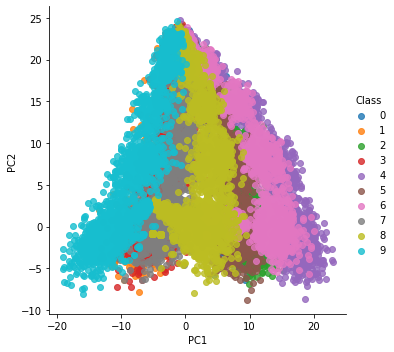

In [43]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:,0], foo[:,1], classifs), columns = ["PC1","PC2","Class"])
    sns.lmplot(data = bar, x = "PC1", y = "PC2", hue = "Class", fit_reg = False)
    
pca_scatter(pca, X_scaled, y)

##### Eightth with K-fold + PCA(None n_components)

Obviously, some cluster can be found but some sample was merged together and it may need more information for the model to learn. Therefore, let's change the components for PCA from 0.85 to None as it will return more components for XGBoost to train. Let's modify the components number and check with the explained variance.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# create standard scaler model for standardization of the data
sc =  StandardScaler()
X_scaled = sc.fit_transform(X)

# create PCA model and fit the data
pca = PCA(n_components = None)
L = pca.fit_transform(X_scaled)

In [45]:
# check the explained variance
print(pca.explained_variance_ratio_ * 100)

[2.04176134e+01 7.27911686e+00 3.43115258e+00 2.05655606e+00
 1.71705063e+00 1.05349918e+00 7.89609499e-01 6.82555977e-01
 5.85859965e-01 5.69987166e-01 5.24708830e-01 5.02888789e-01
 4.72952581e-01 4.55654963e-01 4.51238708e-01 4.42354157e-01
 4.32695778e-01 4.29984401e-01 4.28519271e-01 4.25041699e-01
 4.21349523e-01 4.16782107e-01 4.13492963e-01 4.12393528e-01
 4.09453219e-01 4.06894411e-01 4.02422108e-01 4.00389082e-01
 3.99377416e-01 3.96127129e-01 3.93006995e-01 3.90881359e-01
 3.88767844e-01 3.85912128e-01 3.84630426e-01 3.82073210e-01
 3.79991531e-01 3.78505737e-01 3.76063849e-01 3.74834890e-01
 3.73517504e-01 3.72562346e-01 3.69078036e-01 3.67212624e-01
 3.64562013e-01 3.63017256e-01 3.61617568e-01 3.60710365e-01
 3.58915442e-01 3.57270601e-01 3.56145006e-01 3.53521014e-01
 3.49615374e-01 3.48594144e-01 3.46973331e-01 3.46411044e-01
 3.44336136e-01 3.42554817e-01 3.41222952e-01 3.40296870e-01
 3.38132734e-01 3.36901706e-01 3.34903848e-01 3.34063542e-01
 3.32905697e-01 3.319273

After the change of n_components, more components was obtained. It means it may provide more information than before. Let's run XGBoost again and check for the improvement of the accuracy.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# create a list to contain the result
predictions = []
scores = []

# create the model for stanadardization, PCA & XGBoost
components = None
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = XGBClassifier(n_estimators = 1000, learning_rate = 0.05, objective = 'multi:softmax', 
                        max_depth = 10, booster = 'gbtree', gamma= 0,
                        eval_metric = 'auc', tree_method = 'hist', use_label_encoder = False)
# create the pipeline for work flow
XGB_PCA_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('xgb', _model)
])

# create the model for data fold
rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)

# iterarte each fold of data set & fit in the pipeline
for fold, (train_i, test_i) in enumerate(rskf.split(X,y)):

    print(f"Fold: {fold + 1}")
    X_train, X_test = X.iloc[train_i], X.iloc[test_i]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]

    # fit the model
    XGB_PCA_model.fit(X_train,y_train)

    # predict the result for accuracy
    y_pred = XGB_PCA_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"Accuray: {acc:.5f}")

    y_final = XGB_PCA_model.predict(df_test)
    predictions.append(y_final)

Fold: 1
Accuray: 0.96500
Fold: 2
Accuray: 0.96218
Fold: 3
Accuray: 0.96419
Fold: 4
Accuray: 0.96024
Fold: 5
Accuray: 0.96290


In [47]:
# take the result appeared most in 5-fold result and generate the submission to test the accuracy
from scipy.stats import mode
xgb_result = pd.DataFrame()
xgb_result['row_id'] = df_test.index
xgb_result['target'] = np.squeeze(mode(np.column_stack(predictions),axis = 1)[0]).astype('int')
xgb_result['target'] = xgb_result['target'].map(reverse_target)
xgb_result.to_csv("xgb_pca_submission.csv", index = False)

By setting the n_components to None, number of features of PC was returned. Putting it all into the XGBoost model, it do improved the accuracy a little bit (0.87796). Although the accuracy was improved, it was still lowest than the sixth submission.